# Yet Another Joint Inspection Pilpline 

**Part 1 - Anomaly template model**

<img src="https://i.ibb.co/58WC1Hv/photo-2023-02-27-14-32-50.jpg"  width="60%" height = 30%>

> Ehsan Shaghaei,
> Feb 2023
<img src="https://i.ibb.co/4J2rmx3/QrCode.png"  width="10%">

> [Fun With Science blog](ehsan2754.github.io/funWithScience/)



# Outline
* Task of Anomaly Detection
* Gaussian Probability Distrobution 
* Anamoly Detection Algorithms 


# Task of Anamoly Detection
**Features of [Google data center model](https://patents.google.com/patent/US8688620B2/en)**

$\begin{cases}
x_1 \text{ : Memory usage}\\
x_2 \text{ : }\frac{\# Disk access} { sec}\\
x_3 \text{ : CPU load}\\
x_4 \text{ : Network traffic}
\end{cases}\xrightarrow{P(X)} Y $

## Complimentary Features \+
* Average Voltage
* Avergae Current
* Digital microphones
* Wireless modules
* Illumination conditions
* Dimentionality inspection
* Phsical condition
* Power profile

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, z, xlabel='X', ylabel='Y', zlabel='Z', title='3D Scatter Plot'):
    """
    Plots a 3D scatter plot using matplotlib.

    Args:
        x (list or numpy array): x-axis data
        y (list or numpy array): y-axis data
        z (list or numpy array): z-axis data
        xlabel (str): label for x-axis (default is 'X')
        ylabel (str): label for y-axis (default is 'Y')
        zlabel (str): label for z-axis (default is 'Z')
        title (str): title of plot (default is '3D Scatter Plot')
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x, y, z)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)

    plt.show()


np.random.seed(23)

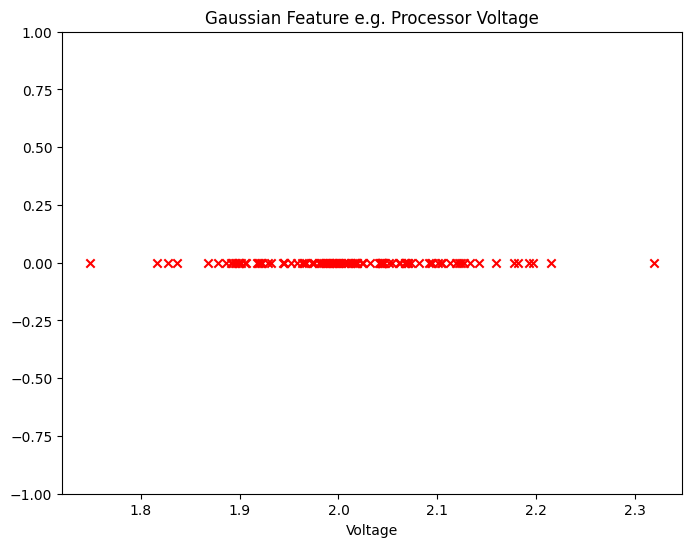

In [2]:
N = 100
mu, sigma = 2, .1

ax = np.zeros(N)
samples = np.random.normal(mu, sigma, N).round(3)

plt.figure(figsize=(8,6))
plt.title('Gaussian Feature e.g. Processor Voltage')
plt.xlabel('Voltage')
plt.ylim(-1,1)
plt.scatter(samples,ax,marker='x',color='r')
plt.show()

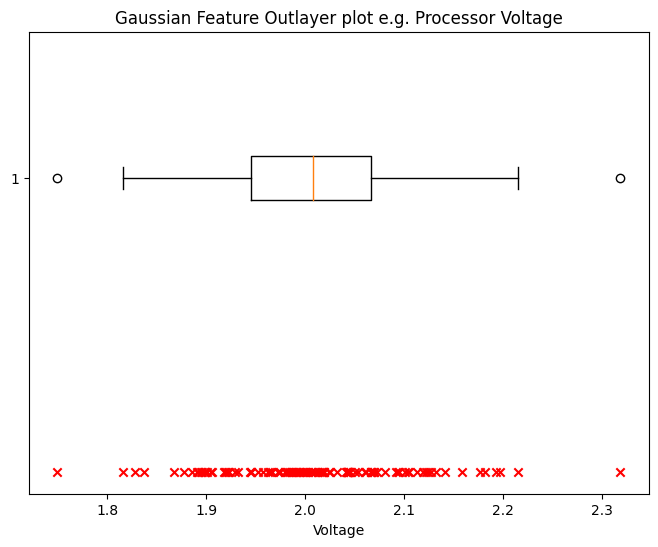

In [3]:
plt.figure(figsize=(8, 6))
plt.title('Gaussian Feature Outlayer plot e.g. Processor Voltage')
plt.xlabel('Voltage')


plt.scatter(samples, ax, marker='x', color='r')
plt.boxplot(samples, vert=False)
plt.show()

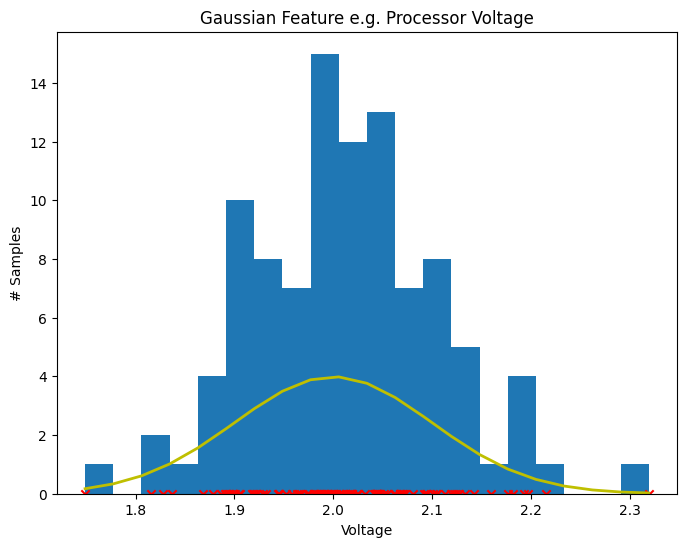

In [4]:

def gaussian(mu,sigma,samples):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (samples - mu)**2 / (2 * sigma**2))

plt.figure(figsize=(8, 6))
plt.title('Gaussian Feature e.g. Processor Voltage')
plt.xlabel('Voltage')
plt.ylabel('# Samples')


count, bins, ignored = plt.hist(samples, N//5, density=False)
plt.scatter(samples, ax, marker='x', color='r')
plt.plot(bins, gaussian(mu,sigma,bins),
         linewidth=2, color='y')

plt.show()


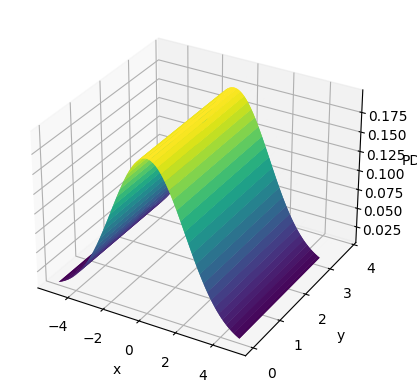

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mu, sigma = 2, .1

# Generate data for the Gaussian distribution
x = np.linspace(-5, 5, 100)

y = gaussian(mu, sigma, x)

# Create a meshgrid for the x and y values
X, Y = np.meshgrid(x, y)

# Compute the corresponding z-values using the Gaussian PDF
Z = gaussian(X, mu, sigma)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
plt.show()


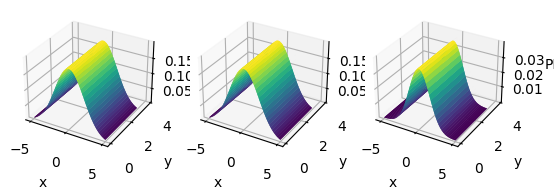

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mu, sigma = 2, .1

# Generate data for the Gaussian distribution
x = np.linspace(-5, 5, 100)

y = gaussian(mu, sigma, x)

# Create a meshgrid for the x and y values
X, Y = np.meshgrid(x, y)

# Compute the corresponding z-values using the Gaussian PDF
Z = gaussian(X, mu, sigma)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')



ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X, Y, Z**2, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')

plt.show()

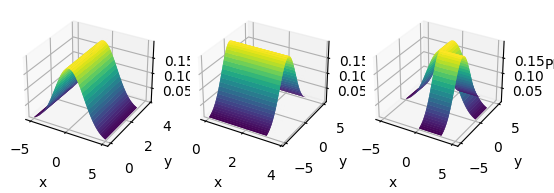

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
mu, sigma = 2, .1

# Generate data for the Gaussian distribution
x = np.linspace(-5, 5, 100)

y = gaussian(mu, sigma, x)

# Create a meshgrid for the x and y values
X, Y = np.meshgrid(x, y)

# Compute the corresponding z-values using the Gaussian PDF
Z = gaussian(X, mu, sigma)

# Plot the 3D surface
fig = plt.figure()
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(Y, X, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')



ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(Y, X, Z, cmap='viridis')
ax.plot_surface(X, Y, Z, cmap='viridis')

# ax.plot_surface(X, Y, Z**2, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')

plt.show()

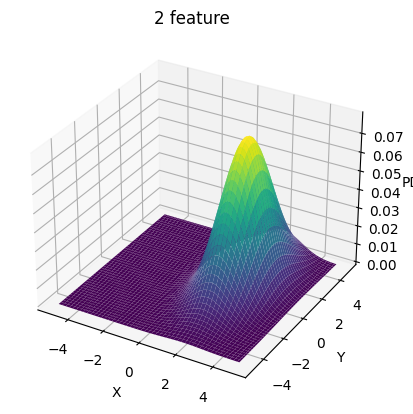

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the mean of the 2D Gaussian distribution
mean = [2, 1]

# Define the standard deviations (sigmas) of the 2D Gaussian distribution
sigma_x = 1
sigma_y = 2

# Create a grid of points
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Compute the probability density function (PDF) of the 2D Gaussian at each point
pdf = np.exp(-((x - mean[0])**2 / (2 * sigma_x**2) + (y - mean[1])**2 / (2 * sigma_y**2))) / (2 * np.pi * sigma_x * sigma_y)

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 2D Gaussian distribution in 3D
ax.plot_surface(x, y, pdf, cmap='viridis')

# Set the labels for the axes and the title of the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')
ax.set_title('2 feature ')

# Show the plot
plt.show()


# Tools / Model Simulators
* [Blip](https://blip.fastforwardlabs.com/)